<a href="https://colab.research.google.com/github/rifqiafr/Tugas-Statistika-Terapan/blob/main/Tugas_Outliers_dan_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### TUGAS STATISTIKA TERAPAN
### Nama Kelompok :
### 1. Muhamad Rifqi Afriansyah (G1A021023)
### 2. Muhamad Iqbal (G1A021073)

In [ ]:
#import library yang digunakan
import pandas as pd
import pandas as pan
import numpy as num
import statistics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
'''
Penjelasan :
Dataset yang digunakan mengenai tentang kumpulan data yang terdiri dari nilai yang diperoleh siswa dalam berbagai mata pelajaran.
Dataset ini kami peroleh dari website kaggle kemudian file csv nya kami import ke github lalu link githubnya kami load di google colab seperti 
dibawah ini.

link asli dataset : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
'''

In [ ]:
#load dataset menggunakan URL
dataset = pan.read_csv("https://raw.githubusercontent.com/rifqiafr/Tugas-Statistika-Terapan/main/exams.csv")

In [ ]:
#URL dataset
url = "https://raw.githubusercontent.com/rifqiafr/Tugas-Statistika-Terapan/main/exams.csv"
exams_csv = pd.read_csv(url)

In [ ]:
#Menampilkan 5 record teratas dari dataset yang telah di load, gunakan head()
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,65,69.0,63
1,female,group D,some high school,free/reduced,none,40,59.0,55
2,male,group E,some college,free/reduced,none,59,NaN,50
3,male,group B,high school,standard,none,77,78.0,68
4,male,group E,associate's degree,standard,completed,78,73.0,68


In [ ]:
#Menampilkan ukuran dataset
dataset.shape

(249, 8)

In [ ]:
#Menampilkan informasi column, datatype dan informasi struktur lainnya pada dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       249 non-null    object 
 1   race/ethnicity               249 non-null    object 
 2   parental level of education  249 non-null    object 
 3   lunch                        249 non-null    object 
 4   test preparation course      249 non-null    object 
 5   math score                   249 non-null    int64  
 6   reading score                248 non-null    float64
 7   writing score                249 non-null    int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 15.7+ KB


In [ ]:
#Menampilkan data statistik dari dataset
dataset.describe()

,math score,reading score,writing score
count,249.000000,248.000000,249.000000
mean,65.714859,68.427419,67.277108
std,15.615433,14.771498,15.592321
min,23.000000,32.000000,20.000000
25%,55.000000,59.000000,57.000000
50%,66.000000,69.000000,68.000000
75%,77.000000,78.000000,78.000000
max,100.000000,100.000000,100.000000


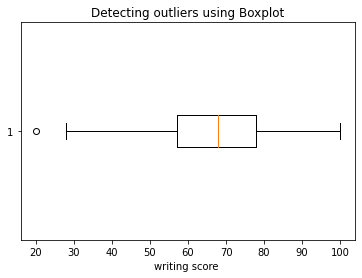

In [ ]:
#Menampilkan outliers dataset pada baris writing score menggunakan boxplot
sample= dataset["writing score"]

plt.boxplot(sample, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('writing score ')
plt.show()

In [ ]:
#Mencari nilai outliers menggunakan metode Z-scores
outliers = []
def detect_outliers_zscore(data):
    theres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > theres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(sample)
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [20]


In [ ]:
#Mencari nilai kuartil 1, kuartil 3, dan IQR
outliers =[]
Q1 = np.quantile(dataset["writing score"], .25)
Q3 = np.quantile(dataset["writing score"], .75)
IQR = Q3 - Q1
print('Kuartil 1 = ', Q1)
print('Kuartil 3 = ', Q3)
print('IQR = ', IQR)

min_IQR = Q1 - 1.5 * IQR
max_IQR = Q3 + 1.5 * IQR

print('IQR minimum = ', min_IQR)
print('IQR maksimum = ', max_IQR)

nilai_min = np.min(dataset["writing score"])
nilai_max = np.max(dataset["writing score"])

Kuartil 1 =  57.0
Kuartil 3 =  78.0
IQR =  21.0
IQR minimum =  25.5
IQR maksimum =  109.5


In [ ]:
#Mencari Outliers pada dataset menggunakan IQR
low_out = []
high_out = []

for i in dataset["writing score"]:
    if (i < min_IQR):
        low_out.append(i)
    if (i > max_IQR):
        high_out.append(i)

print('Low outlier : ', low_out)
print('High outlier : ', high_out)

Low outlier :  [20]
High outlier :  []


In [ ]:
#Menghilangkan outliers pada dataset menggunakan trimming
dataset_no_outlier = dataset[(dataset["writing score"] > nilai_min) & (dataset["writing score"] <= nilai_max)]
dataset_no_outlier

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,65,69.0,63
1,female,group D,some high school,free/reduced,none,40,59.0,55
2,male,group E,some college,free/reduced,none,59,NaN,50
3,male,group B,high school,standard,none,77,78.0,68
4,male,group E,associate's degree,standard,completed,78,73.0,68
...,...,...,...,...,...,...,...,...
244,male,group B,some high school,standard,none,36,34.0,28
245,male,group C,high school,standard,none,68,74.0,71
246,female,group C,some high school,free/reduced,completed,40,52.0,42
247,male,group D,some high school,standard,none,68,71.0,61


In [ ]:
# Menentukan flooring and capping pada dataset
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(sample, 10)
ninetieth_percentile = np.percentile(sample, 90)
print(tenth_percentile, ninetieth_percentile)
b = np.where(sample<tenth_percentile, tenth_percentile, sample)
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
print("New array:",b)

47.0 87.0
New array: [63. 55. 50. 68. 68. 76. 63. 84. 65. 47. 85. 87. 85. 73. 85. 57. 47. 65.
 47. 47. 87. 55. 73. 54. 47. 47. 56. 60. 87. 51. 77. 73. 47. 71. 87. 74.
 75. 54. 73. 77. 72. 64. 82. 70. 87. 51. 57. 78. 73. 57. 64. 60. 85. 49.
 47. 62. 84. 83. 51. 48. 68. 59. 62. 78. 87. 70. 56. 49. 60. 57. 73. 47.
 63. 81. 67. 70. 59. 81. 76. 47. 62. 47. 59. 73. 47. 69. 69. 87. 61. 72.
 47. 70. 87. 87. 72. 67. 87. 49. 49. 53. 62. 79. 77. 67. 58. 82. 73. 47.
 71. 47. 86. 47. 71. 47. 74. 76. 63. 55. 58. 87. 71. 87. 62. 47. 86. 58.
 64. 47. 87. 87. 82. 64. 57. 56. 54. 69. 76. 68. 49. 64. 57. 83. 87. 60.
 68. 57. 66. 47. 87. 47. 80. 59. 76. 73. 58. 47. 59. 87. 87. 79. 87. 65.
 87. 75. 70. 87. 58. 68. 87. 83. 59. 76. 71. 62. 72. 60. 56. 51. 87. 86.
 64. 49. 87. 76. 87. 87. 67. 59. 64. 53. 53. 51. 61. 87. 66. 48. 48. 51.
 70. 65. 65. 47. 70. 67. 82. 75. 84. 81. 84. 66. 68. 85. 70. 64. 77. 60.
 66. 77. 68. 62. 83. 74. 47. 83. 87. 72. 47. 73. 81. 82. 78. 70. 47. 72.
 82. 87. 64. 87. 64. 75. 82. 8

In [ ]:
# Replace with median
median = np.median(sample)
for i in sample_outliers:
    c = np.where(sample==i, 14,sample)
print("Sample: ", sample)
print("New array: ",c)

Sample:  0      63
1      55
2      50
3      68
4      68
       ..
244    28
245    71
246    42
247    61
248    52
Name: writing score, Length: 249, dtype: int64
New array:  [ 63  55  50  68  68  76  63  84  65  45  85  90  85  73  85  57  14  65
  44  31  88  55  73  54  32  42  56  60  89  51  77  73  39  71  89  74
  75  54  73  77  72  64  82  70  87  51  57  78  73  57  64  60  85  49
  47  62  84  83  51  48  68  59  62  78  97  70  56  49  60  57  73  47
  63  81  67  70  59  81  76  45  62  42  59  73  39  69  69  88  61  72
  42  70  87  93  72  67 100  49  49  53  62  79  77  67  58  82  73  44
  71  33  86  47  71  33  74  76  63  55  58  87  71  89  62  45  86  58
  64  45  87 100  82  64  57  56  54  69  76  68  49  64  57  83  87  60
  68  57  66  46 100  44  80  59  76  73  58  47  59  87  93  79  97  65
  91  75  70  92  58  68  93  83  59  76  71  62  72  60  56  51  95  86
  64  49  89  76  87  99  67  59  64  53  53  51  61  89  66  48  48  51
  70  65  65  47  7

In [ ]:
# Replace with mean
mean = np.mean(sample)
for i in sample_outliers:
    c = np.where(sample==i, 14,sample)
print("Sample: ", sample)
print("New array: ",c)

Sample:  0      63
1      55
2      50
3      68
4      68
       ..
244    28
245    71
246    42
247    61
248    52
Name: writing score, Length: 249, dtype: int64
New array:  [ 63  55  50  68  68  76  63  84  65  45  85  90  85  73  85  57  14  65
  44  31  88  55  73  54  32  42  56  60  89  51  77  73  39  71  89  74
  75  54  73  77  72  64  82  70  87  51  57  78  73  57  64  60  85  49
  47  62  84  83  51  48  68  59  62  78  97  70  56  49  60  57  73  47
  63  81  67  70  59  81  76  45  62  42  59  73  39  69  69  88  61  72
  42  70  87  93  72  67 100  49  49  53  62  79  77  67  58  82  73  44
  71  33  86  47  71  33  74  76  63  55  58  87  71  89  62  45  86  58
  64  45  87 100  82  64  57  56  54  69  76  68  49  64  57  83  87  60
  68  57  66  46 100  44  80  59  76  73  58  47  59  87  93  79  97  65
  91  75  70  92  58  68  93  83  59  76  71  62  72  60  56  51  95  86
  64  49  89  76  87  99  67  59  64  53  53  51  61  89  66  48  48  51
  70  65  65  47  7

Text(0.5, 0, 'writing score')

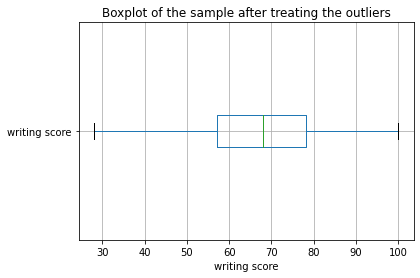

In [ ]:
#Menampilkan boxplot yang telah bebas dari outliers 
dataset_no_outlier.boxplot(["writing score"],vert=False)
plt.title("Boxplot of the sample after treating the outliers")
plt.xlabel("writing score")

### Correlation Analysis (bivariate)

In [ ]:
#Menampilkan korelasi antar kolom numerik
dataset.corr()

,math score,reading score,writing score
math score,1.000000,0.820733,0.802419
reading score,0.820733,1.000000,0.949625
writing score,0.802419,0.949625,1.000000


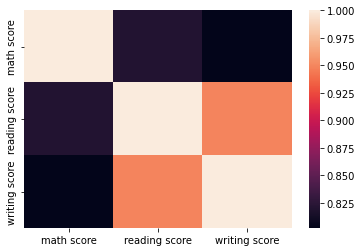

In [ ]:
#Menampilkan korelasi dataset menggunakan heatmap, yang dimana semakin tinggi angka suatu kelompok data maka warnanya akan semakin gelap
sns.heatmap(dataset.corr())
plt.show()